---

Load Data

In [54]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 
import plotly.graph_objects as go


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTENC
from plotly.subplots import make_subplots

# Model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

print("Import Berhasil")

Import Berhasil


In [55]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kendalltau
import pickle
import plotly.express  as px 
import plotly.graph_objects as go


# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer , OutlierTrimmer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTENC
from plotly.subplots import make_subplots

# Model 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score

# Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

print("Import Berhasil")

Import Berhasil


In [56]:
# Load Dataset
df = pd.read_csv('Airline Dataset.csv')
df

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98614,58454,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,22028,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,61732,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,19819,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled


In [57]:
# Menampilkan 10 baris pertama dari sebuah DataFrame
df.head(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Edithe Leggis,On Time
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Elwood Catt,On Time
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Darby Felgate,On Time
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Dominica Pyle,Delayed
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Bay Pencost,On Time
5,39630,Lora,Durbann,Female,55,Brazil,Coronel Horácio de Mattos Airport,BR,Brazil,SAM,South America,6/10/2022,LEC,Lora Durbann,On Time
6,11940,Rand,Bram,Male,73,Ivory Coast,Duxford Aerodrome,GB,United Kingdom,EU,Europe,10/30/2022,QFO,Rand Bram,Cancelled
7,26470,Perceval,Dallosso,Male,36,Vietnam,Maestro Wilson Fonseca Airport,BR,Brazil,SAM,South America,4/7/2022,STM,Perceval Dallosso,Cancelled
8,29447,Aleda,Pigram,Female,35,Palestinian Territory,Venice Marco Polo Airport,IT,Italy,EU,Europe,8/20/2022,VCE,Aleda Pigram,On Time
9,75035,Burlie,Schustl,Male,13,Thailand,Vermilion Airport,CA,Canada,NAM,North America,4/6/2022,YVG,Burlie Schustl,On Time


In [58]:
# Menampilkan 10 baris terakhir dari sebuah DataFrame 
df.tail(10)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
98609,70741,Olimpia,Arstall,Female,22,China,Wuzhou Changzhoudao Airport,CN,China,AS,Asia,4/23/2022,WUZ,Olimpia Arstall,On Time
98610,87872,Che,Pressland,Male,83,France,Warangal Airport,IN,India,AS,Asia,8/5/2022,WGC,Che Pressland,Cancelled
98611,37761,Hadria,Vacher,Female,41,Canada,Ipil Airport,PH,Philippines,AS,Asia,6/6/2022,IPE,Hadria Vacher,On Time
98612,26208,Ody,Tineman,Male,82,Indonesia,Five Mile Airport,US,United States,NAM,North America,3/17/2022,FMC,Ody Tineman,Delayed
98613,95651,Oneida,Ossipenko,Female,47,Serbia,Arugam Bay SPB,LK,Sri Lanka,AS,Asia,5/12/2022,AYY,Oneida Ossipenko,Delayed
98614,58454,Gareth,Mugford,Male,85,China,Hasvik Airport,NO,Norway,EU,Europe,12/11/2022,HAA,Gareth Mugford,Cancelled
98615,22028,Kasey,Benedict,Female,19,Russia,Ampampamena Airport,MG,Madagascar,AF,Africa,10/30/2022,IVA,Kasey Benedict,Cancelled
98616,61732,Darrin,Lucken,Male,65,Indonesia,Albacete-Los Llanos Airport,ES,Spain,EU,Europe,9/10/2022,ABC,Darrin Lucken,On Time
98617,19819,Gayle,Lievesley,Female,34,China,Gagnoa Airport,CI,Côte d'Ivoire,AF,Africa,10/26/2022,GGN,Gayle Lievesley,Cancelled
98618,14485,Wilhelmine,Touret,Female,10,Poland,Yoshkar-Ola Airport,RU,Russian Federation,EU,Europe,4/16/2022,JOK,Wilhelmine Touret,Delayed


In [59]:
# Mengakses informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  int64 
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(2), object(13)
memory usage

In [60]:
# Mengecek nama-nama kolom dalam DataFrame
df.columns

Index(['Passenger ID', 'First Name', 'Last Name', 'Gender', 'Age',
       'Nationality', 'Airport Name', 'Airport Country Code', 'Country Name',
       'Airport Continent', 'Continents', 'Departure Date', 'Arrival Airport',
       'Pilot Name', 'Flight Status'],
      dtype='object')

In [61]:
#  Menghasilkan statistik deskriptif dari DataFrame
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passenger ID,98619.0,55168.689522,25985.443696,10000.0,32608.0,55338.0,77695.0,99999.0
Age,98619.0,45.504021,25.929849,1.0,23.0,46.0,68.0,90.0


In [62]:
# Mengecek data duplicate 
df.duplicated().sum()

0

In [63]:
# Duplicate Data
dataduplicate = df.copy()

print("Berhasil Duplicate Data")

Berhasil Duplicate Data


---

Exploratory Data Analysis

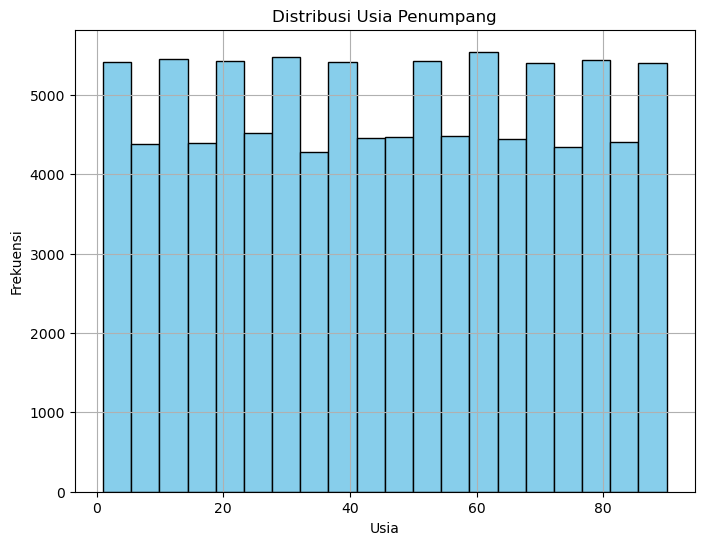

Statistik Deskriptif untuk Kolom 'Age':
 count    98619.000000
mean        45.504021
std         25.929849
min          1.000000
25%         23.000000
50%         46.000000
75%         68.000000
max         90.000000
Name: Age, dtype: float64


In [64]:
# Hitung statistik deskriptif untuk kolom 'Age'
age_stats = df['Age'].describe()

# Buat histogram untuk melihat distribusi usia penumpang
plt.figure(figsize=(8, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Usia Penumpang')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(True)
plt.show()

# Cetak statistik deskriptif
print("Statistik Deskriptif untuk Kolom 'Age':\n", age_stats)


*Description:*
> - Rata-rata usia penumpang adalah sekitar 45.5 tahun.
> - Usia termuda yang tercatat adalah 1 tahun, sedangkan usia tertua adalah 90 tahun.
> - Usia penumpang cenderung tersebar luas dengan sebagian besar penumpang berada di rentang usia antara 23 dan 68 tahun. 
> - Sedangkan, rata-rata usia yang relatif tinggi (45.5 tahun) menunjukkan kemungkinan adanya kecenderungan untuk penumpang yang lebih tua dalam dataset ini.

Unique values for 'Gender': ['Female' 'Male']
Unique values for 'Flight Status': ['On Time' 'Delayed' 'Cancelled']


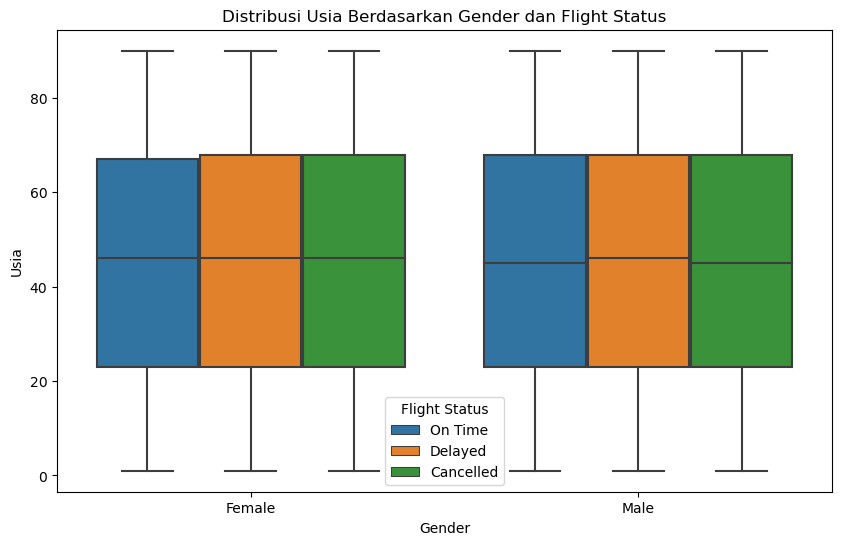

<Figure size 1000x600 with 0 Axes>

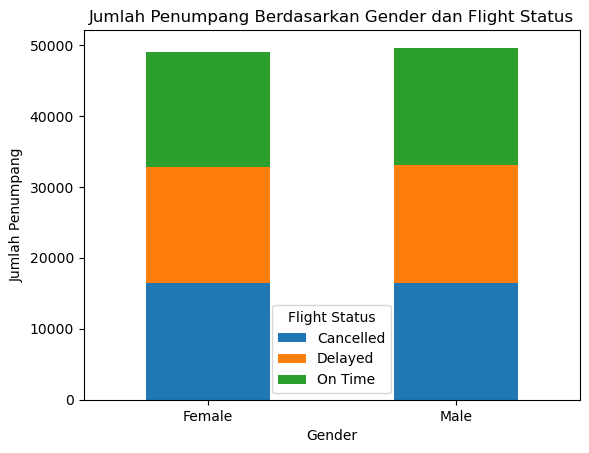

In [65]:

# Cetak nilai unik untuk kolom 'Gender' dan 'Flight Status'
print("Unique values for 'Gender':", df['Gender'].unique())
print("Unique values for 'Flight Status':", df['Flight Status'].unique())

# Buat box plot untuk melihat distribusi usia berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=df, hue='Flight Status')
plt.title('Distribusi Usia Berdasarkan Gender dan Flight Status')
plt.xlabel('Gender')
plt.ylabel('Usia')
plt.legend(title='Flight Status')
plt.show()

# Hitung jumlah penumpang berdasarkan kombinasi Gender dan Flight Status
gender_flight_count = df.groupby(['Gender', 'Flight Status']).size().unstack()

# Buat stacked bar plot untuk menampilkan jumlah penumpang berdasarkan kombinasi Gender dan Flight Status
plt.figure(figsize=(10, 6))
gender_flight_count.plot(kind='bar', stacked=True)
plt.title('Jumlah Penumpang Berdasarkan Gender dan Flight Status')
plt.xlabel('Gender')
plt.ylabel('Jumlah Penumpang')
plt.legend(title='Flight Status')
plt.xticks(rotation=0)
plt.show()

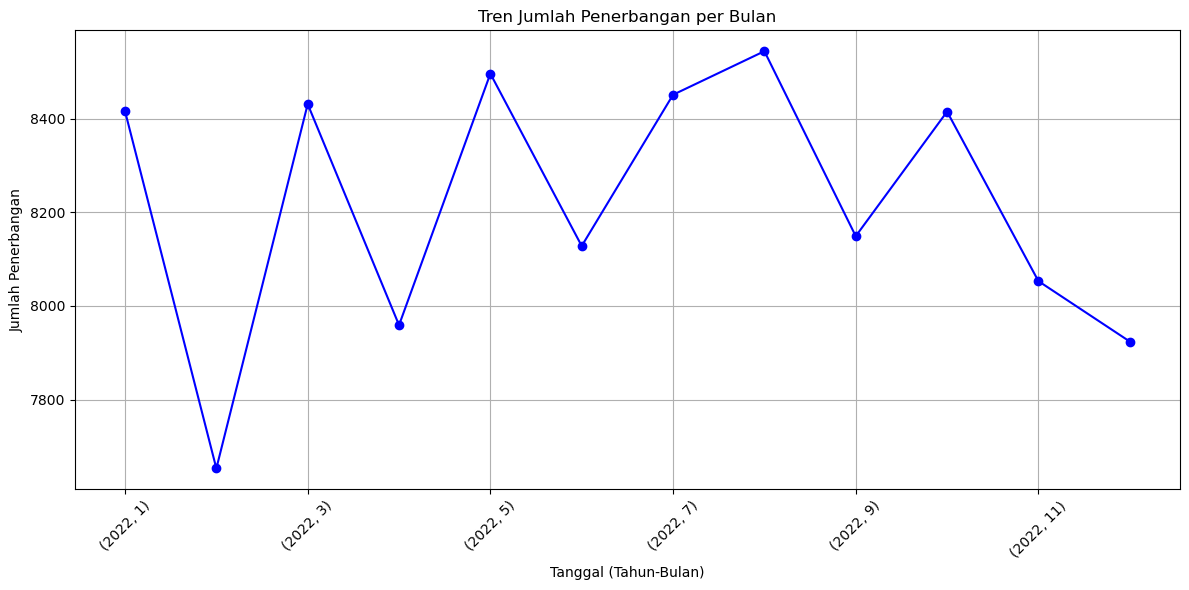

In [66]:
# Konversi kolom 'Departure Date' menjadi tipe data datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Ekstrak tahun dan bulan dari kolom 'Departure Date'
df['Year'] = df['Departure Date'].dt.year
df['Month'] = df['Departure Date'].dt.month

# Hitung jumlah penerbangan per bulan
flights_per_month = df.groupby(['Year', 'Month']).size()

# Buat visualisasi tren waktu menggunakan grafik garis
plt.figure(figsize=(12, 6))
flights_per_month.plot(marker='o', color='b', linestyle='-')
plt.title('Tren Jumlah Penerbangan per Bulan')
plt.xlabel('Tanggal (Tahun-Bulan)')
plt.ylabel('Jumlah Penerbangan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Description:*
> - Adanya pola musiman dalam jumlah penerbangan, di mana beberapa bulan mungkin memiliki jumlah penerbangan yang lebih tinggi (misalnya, bulan liburan atau musim liburan) sementara yang lainnya mungkin memiliki jumlah penerbangan yang lebih rendah.

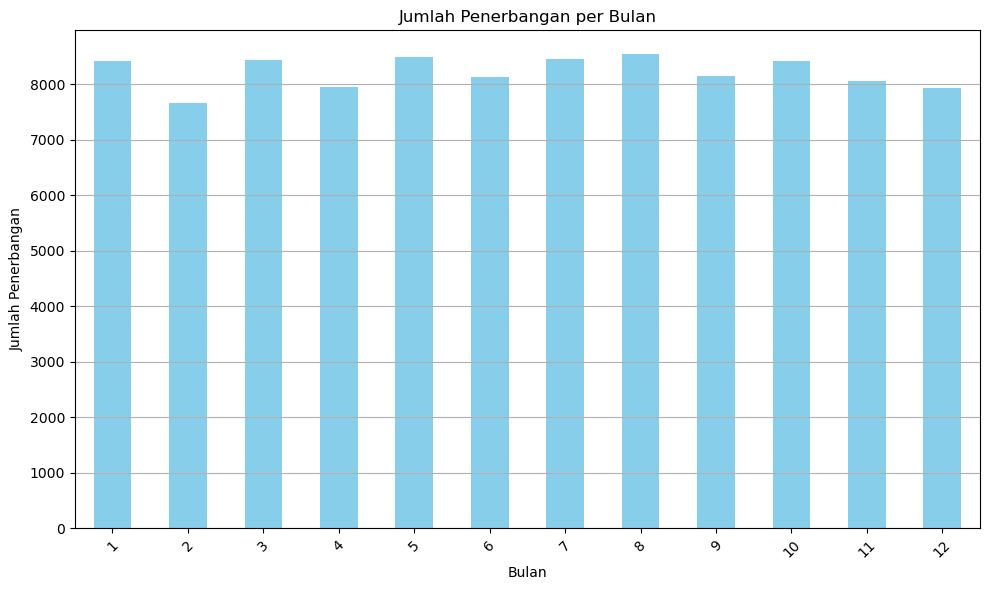

Unique values for 'Month': [ 6 12  1  9  2 10  4  8  5  3  7 11]
Bulan dengan jumlah penerbangan paling banyak: 8
Bulan dengan jumlah penerbangan paling sedikit: 2


In [67]:

# Konversi kolom 'Departure Date' menjadi tipe data datetime
df['Departure Date'] = pd.to_datetime(df['Departure Date'])

# Ekstrak bulan dari kolom 'Departure Date'
df['Month'] = df['Departure Date'].dt.month

# Hitung jumlah penerbangan per bulan
flights_per_month = df.groupby('Month').size()

# Temukan bulan dengan jumlah penerbangan paling banyak dan paling sedikit
max_flights_month = flights_per_month.idxmax()
min_flights_month = flights_per_month.idxmin()

# Buat visualisasi untuk menampilkan jumlah penerbangan per bulan
plt.figure(figsize=(10, 6))
flights_per_month.plot(kind='bar', color='skyblue')
plt.title('Jumlah Penerbangan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penerbangan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Cetak nilai unik
print("Unique values for 'Month':", df['Month'].unique())
print("Bulan dengan jumlah penerbangan paling banyak:", max_flights_month)
print("Bulan dengan jumlah penerbangan paling sedikit:", min_flights_month)

*Description:*
> - Pada bulan 8 terdapat jumlah penerbangan paling banyak.
> - Sedangkan pada bulan 2 jumlah penerbangan paling sedikit.

---

Handling Data

In [68]:
df.head(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Year,Month
0,10856,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Edithe Leggis,On Time,2022,6
1,43872,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Elwood Catt,On Time,2022,12
2,42633,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Darby Felgate,On Time,2022,1
3,78493,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Dominica Pyle,Delayed,2022,9
4,82072,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Bay Pencost,On Time,2022,2


In [69]:
# Feature Engineering: Extract day of the week, month from Departure Date
df['Departure Date'] = pd.to_datetime(df['Departure Date'])
df['Day_of_Week'] = df['Departure Date'].dt.dayofweek
df['Month'] = df['Departure Date'].dt.month

# Prepare the features
features = ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Day_of_Week', 'Month', 'Pilot Name']
X = df[features].copy()  # Create a copy to avoid SettingWithCopyWarning

# Label Encoding for categorical features
label_encoders = {}
for feature in ['Airport Name', 'Airport Country Code', 'Country Name', 'Airport Continent', 'Pilot Name']:
    le = LabelEncoder()
    X.loc[:, feature] = le.fit_transform(X[feature])  # Use .loc to avoid SettingWithCopyWarning
    label_encoders[feature] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Prepare the target variable
y = df['Flight Status'].apply(lambda x: 1 if x == 'Delayed' else 0)  # Adjust this based on your actual data

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost classifier
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)

# Make predictions
y_pred = xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.6539748529709998
              precision    recall  f1-score   support

           0       0.66      0.97      0.79     13069
           1       0.33      0.02      0.05      6655

    accuracy                           0.65     19724
   macro avg       0.50      0.50      0.42     19724
weighted avg       0.55      0.65      0.54     19724



In [70]:
# Memisahkan kolom berdasarkan tipe data
kolom_kategorikal = df.select_dtypes(include=['object', 'category'])
kolom_numerikal = df.select_dtypes(include=['int', 'float'])


In [71]:
# Memeriksa jumlah nilai unik dalam setiap kolom
for kolom in df.columns:
    unique_values = len(df[kolom].unique())
    if unique_values < 10:  # Angka 10 di sini hanyalah contoh, Anda dapat menyesuaikan dengan kebutuhan Anda
        print(f"{kolom} adalah kolom kategorikal dengan {unique_values} nilai unik.")


Gender adalah kolom kategorikal dengan 2 nilai unik.
Airport Continent adalah kolom kategorikal dengan 6 nilai unik.
Continents adalah kolom kategorikal dengan 6 nilai unik.
Flight Status adalah kolom kategorikal dengan 3 nilai unik.
Year adalah kolom kategorikal dengan 1 nilai unik.
Day_of_Week adalah kolom kategorikal dengan 7 nilai unik.


In [72]:
print("Kolom Kategorikal:")
for kolom in kolom_kategorikal.columns:
    print(kolom)

print("---")

print("Kolom Numerikal:")
for kolom in kolom_numerikal.columns:
    print(kolom)



Kolom Kategorikal:
First Name
Last Name
Gender
Nationality
Airport Name
Airport Country Code
Country Name
Airport Continent
Continents
Arrival Airport
Pilot Name
Flight Status
---
Kolom Numerikal:
Passenger ID
Age
Year
Month
Day_of_Week


In [73]:
df['Flight Status'].max()

'On Time'

In [74]:
# Handling Missing Value
df.isna().sum()

Passenger ID            0
First Name              0
Last Name               0
Gender                  0
Age                     0
Nationality             0
Airport Name            0
Airport Country Code    0
Country Name            0
Airport Continent       0
Continents              0
Departure Date          0
Arrival Airport         0
Pilot Name              0
Flight Status           0
Year                    0
Month                   0
Day_of_Week             0
dtype: int64

*Description:*
> - tidak terdapat missing value pada setiap kolom.

In [75]:
# Melihat jenis-jenis dalam kolom flight status
jenis_flight_status = df['Flight Status'].unique()

# Menampilkan jumlah jenis
print("Jumlah jenis dalam kolom flight status:", len(jenis_flight_status))
print("Jenis-jenis dalam kolom flight status:", jenis_flight_status)

Jumlah jenis dalam kolom flight status: 3
Jenis-jenis dalam kolom flight status: ['On Time' 'Delayed' 'Cancelled']


In [76]:
# Menghitung jumlah 'On Time'
jumlah_On_Time = df['Flight Status'].value_counts()['On Time']

# Menghitung jumlah 'Delayed'
jumlah_Delayed = df['Flight Status'].value_counts()['Delayed']

# Menghitung jumlah 'Cancelled'
jumlah_cancelled = df['Flight Status'].value_counts()['Cancelled']

# Menampilkan jumlah 'On Time'
print("Jumlah 'On Time':", jumlah_On_Time)
# Menampilkan jumlah 'Delayed'
print("Jumlah 'Delayed':", jumlah_Delayed)
# Menampilkan jumlah 'Cancelled'
print("Jumlah 'Cancelled':", jumlah_cancelled)

Jumlah 'On Time': 32846
Jumlah 'Delayed': 32831
Jumlah 'Cancelled': 32942
